In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier


from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import pickle
import os



In [138]:
df = pd.read_csv('C:/Users/katta/Downloads/loan prediction project/data/train_data.csv')

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [139]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [140]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Target
y = df['Loan_Status']
le_target = LabelEncoder()
y = le_target.fit_transform(y)  # Y->1, N->0

# Features
X = df.drop('Loan_Status', axis=1)

# Separate numeric and categorical columns
num_cols = X.select_dtypes(include=np.number).columns
cat_cols = X.select_dtypes(include='object').columns

# Impute missing values
num_imputer = SimpleImputer(strategy='median')
X[num_cols] = num_imputer.fit_transform(X[num_cols])

cat_imputer = SimpleImputer(strategy='most_frequent')
X[cat_cols] = cat_imputer.fit_transform(X[cat_cols])

# Encode categorical features
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Scale numeric features
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])


In [141]:




# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


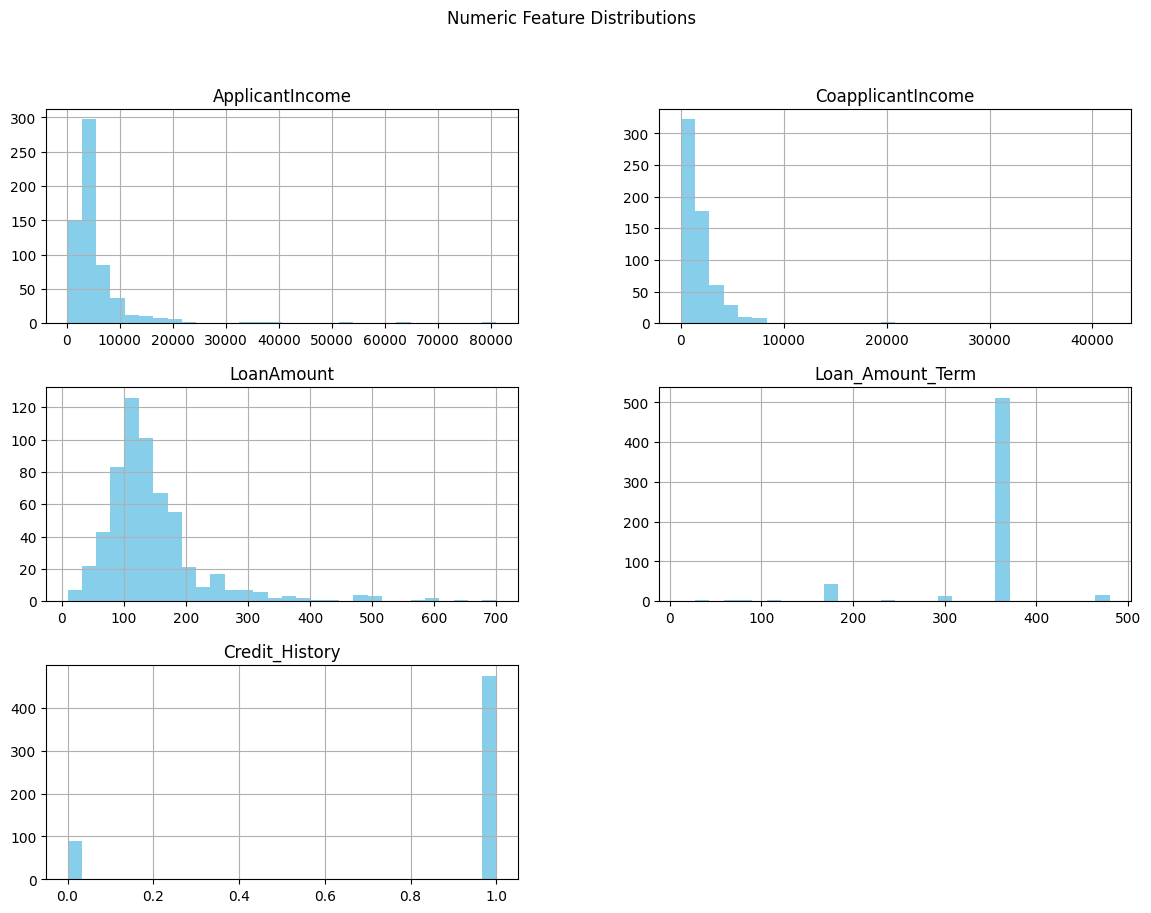

In [142]:


num_cols = df.select_dtypes(include=np.number).columns

df[num_cols].hist(bins=30, figsize=(14,10), color='skyblue')
plt.suptitle("Numeric Feature Distributions")
plt.show()


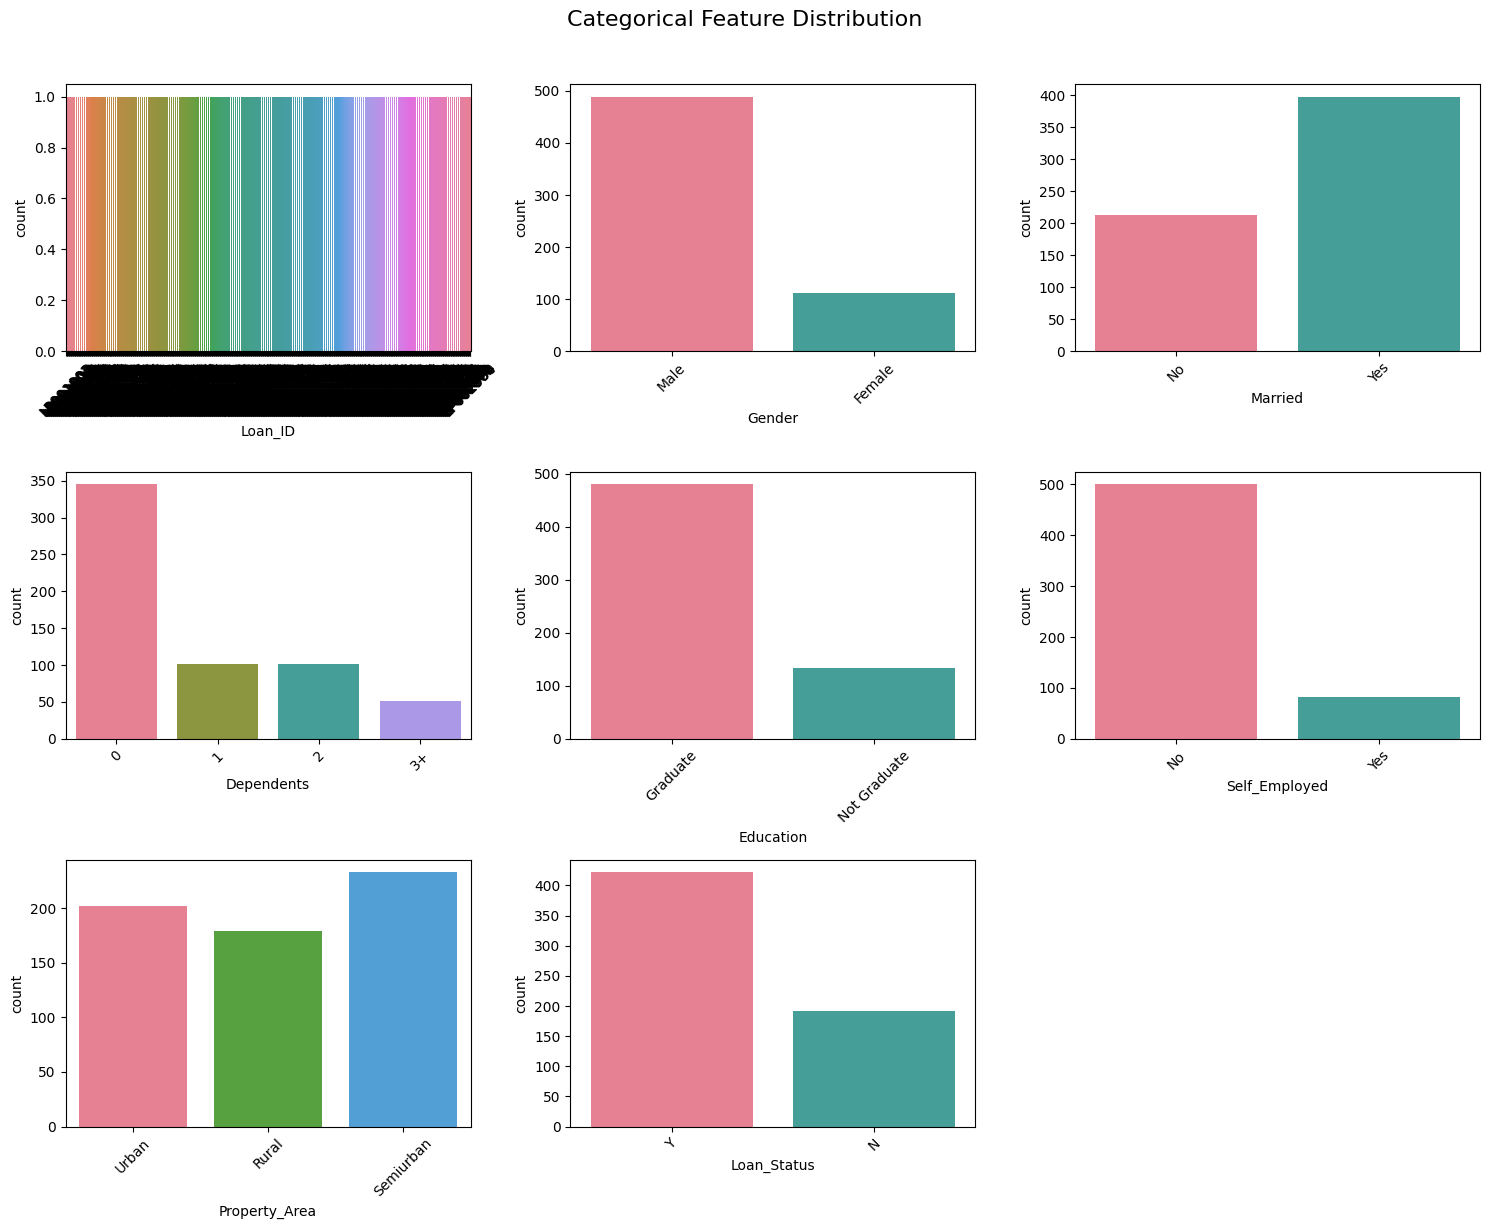

In [143]:
cat_cols = df.select_dtypes(include="object").columns
n_cols = 3  # plots per row
n_rows = math.ceil(len(cat_cols)/n_cols)

plt.figure(figsize=(n_cols*5, n_rows*4))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=df, x=col, hue=col, legend=False, palette="husl")
    plt.xticks(rotation=45)
plt.suptitle("Categorical Feature Distribution", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

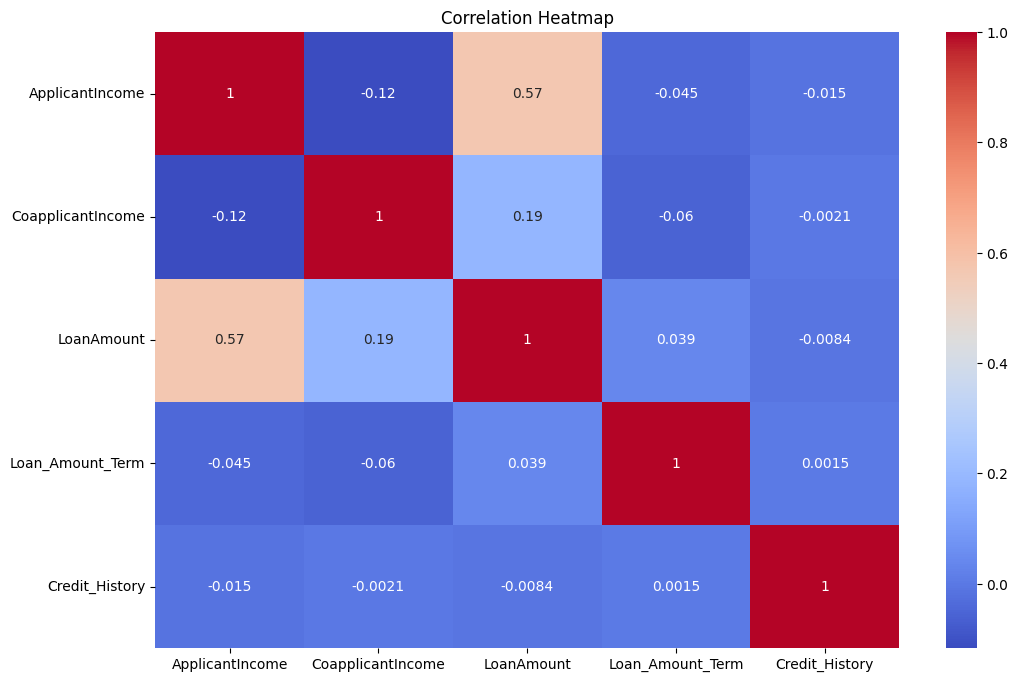

In [144]:
plt.figure(figsize=(12,8))

# Select only numeric columns
numeric_df = df.select_dtypes(include=np.number)

sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


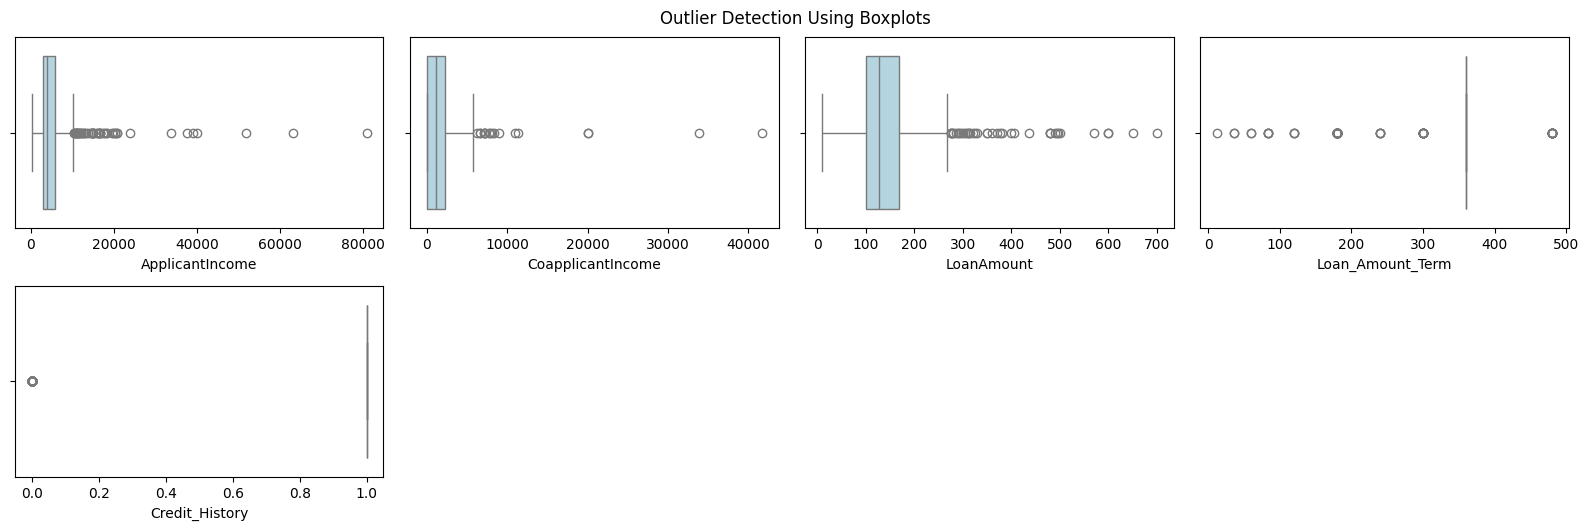

In [145]:
plt.figure(figsize=(16,10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=df, x=col, color="lightblue")
plt.suptitle("Outlier Detection Using Boxplots")
plt.tight_layout()
plt.show()


In [146]:
lr_model = LogisticRegression(max_iter=2000)
lr_model.fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
lr_acc


0.7886178861788617

In [147]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
rf_acc


0.7804878048780488

In [148]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

svm_pred = svm_model.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
svm_acc


0.6504065040650406

In [149]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
dt_acc


0.7317073170731707

In [150]:
results = {
    "Logistic Regression": lr_acc,
    "Random Forest": rf_acc,
    "SVM": svm_acc,
    "Decision Tree": dt_acc
}

results


{'Logistic Regression': 0.7886178861788617,
 'Random Forest': 0.7804878048780488,
 'SVM': 0.6504065040650406,
 'Decision Tree': 0.7317073170731707}

In [151]:
best_model = max(results, key=results.get)
best_model


'Logistic Regression'

In [153]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Model
rf = RandomForestClassifier(n_estimators=200, max_depth=6, random_state=42)

# K-Fold (Stratified ensures class balance in each fold)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation
cv_scores = cross_val_score(rf, X, y, cv=kf, scoring='accuracy')

print("Accuracy per fold:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))


Accuracy per fold: [0.82113821 0.82113821 0.79674797 0.77235772 0.81967213]
Mean Accuracy: 0.8062108489937359


In [152]:
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)

# ------------------ Create model folder ------------------
if not os.path.exists("model"):
    os.makedirs("model")

# ------------------ Save files ------------------
with open("model/best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

with open("model/scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

with open("model/label_encoders.pkl", "wb") as f:
    pickle.dump(label_encoders, f)

feature_order = X_train.columns.tolist()
with open("model/feature_order.pkl", "wb") as f:
    pickle.dump(feature_order, f)

print("✅ All files saved in 'model/' folder successfully")

✅ All files saved in 'model/' folder successfully


In [162]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv("C:\\Users\\katta\\Downloads\\loan prediction project\\data\\train_data.csv")

# Drop Loan_ID - not needed for prediction
X = df.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = df['Loan_Status']

# Encode target
le_target = LabelEncoder()
y = le_target.fit_transform(y)  # 'Y'->1, 'N'->0

# Encode categorical features
cat_cols = X.select_dtypes(include='object').columns
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))  # convert NaN to string for LabelEncoder
    label_encoders[col] = le

# Fill missing numeric values
num_cols = X.select_dtypes(include=np.number).columns
X[num_cols] = X[num_cols].fillna(X[num_cols].median())

# Scale numeric features
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.2f}")

# K-Fold Cross Validation
cv_scores = cross_val_score(model, X, y, cv=5)
print(f"5-Fold CV Accuracy: {cv_scores.mean():.2f}")

# Save objects
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

with open("encoders.pkl", "wb") as f:
    pickle.dump(label_encoders, f)

with open("le_target.pkl", "wb") as f:
    pickle.dump(le_target, f)

print("Training done and all objects saved!")


Test Accuracy: 0.77
5-Fold CV Accuracy: 0.78
Training done and all objects saved!
